<h1 style="text-align:center;background-color:#336699;color:white;">TP6
Analyse et prédiction des infections COVID-19</h1>
<h3 style="color:#8080C0"><i style="color:red">L’objectif de ce TP</i> est d’explorer ces données pour en extraire des connaissances afin d’aider la communauté à mieux comprendre la propagation du COVID-19.
<br/>Le TP est composé de l’ensemble des questions suivant :
<br/>Afin d'analyser l'ensemble des données, vous devez identifier et extraire certaines informations statistiques sur les données, par exemple : le type de données, les valeurs manquantes, les valeurs aberrantes, la corrélation entre les variables, etc.
<br>Dans le cas des valeurs manquantes, vous pouvez les remplacer par la moyenne, la médiane ou le mode de la variable concernée.</h3>

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: QIAN Xiaotong
@author: BIAN Yiping
"""
import pandas as pd
import numpy as np
import time

data = pd.read_csv("clean-hubei.csv")
data

,id,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
0,1,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
1,2,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
2,3,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
3,4,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
4,5,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,14725,NaN,NaN,Qianjiang City,Hubei,China,30.403861,112.886318,point,NaN,...,NaN,NaN,NaN,NaN,NaN,Qianjiang City,NaN,Hubei,China,429005
10131,14726,NaN,NaN,Qianjiang City,Hubei,China,30.403861,112.886318,point,NaN,...,NaN,NaN,NaN,NaN,NaN,Qianjiang City,NaN,Hubei,China,429005
10132,14727,NaN,NaN,Shennongjia Forest District,Hubei,China,31.583333,110.500000,point,NaN,...,NaN,NaN,NaN,NaN,NaN,Shennongjia Forest District,NaN,Hubei,China,429021
10133,14728,NaN,NaN,Shennongjia Forest District,Hubei,China,31.583333,110.500000,point,NaN,...,NaN,NaN,NaN,NaN,NaN,Shennongjia Forest District,NaN,Hubei,China,429021


In [2]:
data.dtypes

id                            int64
age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_wuhan               object
travel_history_dates        float64
travel_history_location     float64
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion        float64
location                    float64
admin3                       object
admin2                      

<h3 style = "color:Orange">Data pre-processing</h3>
<h5 style = "color: #38B0DE">Etape 1 : D'abord on a vu pas mal de valeur manquantes, donc on va supprimer les colonnes qui contient qu'une seule type de valeur ou qui contient que "Nan". </h5>

In [3]:
for index,row in data.iteritems():
    if len(data[index].unique()) == 1:
        print(index,' : ',data[index].unique())

province  :  ['Hubei']
country  :  ['China']
geo_resolution  :  ['point']
travel_history_dates  :  [nan]
travel_history_location  :  [nan]
notes_for_discussion  :  [nan]
location  :  [nan]
admin1  :  ['Hubei']
country_new  :  ['China']


In [4]:
data = data.drop(['province','country','geo_resolution',
                  'travel_history_dates','travel_history_location',
                  'notes_for_discussion','location',
                  'admin1','country_new'],axis=1)

<h5 style = "color: #38B0DE">Etape 2 : Ensuite on calcule le pourcentage de valeur manquante de chaque variable. Supprimer qui est plus grand que 0.999</h5>

In [5]:
for index,row in data.iteritems():
       if (data[index].isna().sum()/len(data[index])>0.999):
               print(index,' : ',data[index].isna().sum()/len(data[index]))

reported_market_exposure  :  0.9999013320177602
sequence_available  :  0.9998026640355204


In [6]:
data = data.drop(['reported_market_exposure','sequence_available'],axis=1)

<h5 style = "color: #38B0DE">Etape 3 : Ensuite on voit les variables qui contient les "date", et on choisi le mimum de la date de ces variables, ensuite on remplace les valeurs par la distance entre cette date et les valeurs.</h5>

In [7]:
data['date_onset_symptoms'].unique()

array(['- 18.01.2020', nan, '23.12.2019', '10.12.2019', '10.01.2020',
       '13.01.2020', '20.12.2019', '30.12.2019', '05.01.2020',
       '06.01.2020', '09.01.2020', '22.12.2019', '15.01.2020',
       '03.01.2020', '11.01.2020', '01.01.2020 - 31.01.2020',
       '02.01.2020', '18.01.2020', '08.01.2020', '12.01.2020',
       '26.11.2020', '29.12.2019'], dtype=object)

In [8]:
data['date_admission_hospital'].unique()

array([nan, '27.12.2019', '31.12.2019', '16.01.2020', '10.12.2019',
       '18.01.2020', '03.01.2020', '05.01.2020', '11.01.2020',
       '14.01.2020', '06.01.2020', '13.01.2020', '09.01.2020',
       '19.01.2020', '17.01.2020', '23.01.2020', '15.01.2020',
       '01.01.2020', '12.01.2020', '21.01.2020'], dtype=object)

In [9]:
data['date_confirmation'].unique()

array(['20.01.2020', nan, '18.01.2020', '19.01.2020', '23.01.2020',
       '27.01.2020', '28.01.2020', '29.01.2020', '30.01.2020',
       '31.01.2020', '01.02.2020', '03.02.2020'], dtype=object)

In [10]:
data['date_death_or_discharge'].unique()

array([nan, '16.01.2020', '20.01.2020', '19.01.2020', '09.01.2020',
       '15.01.2020', '18.01.2020', '21.01.2020', '22.01.2020',
       '23.01.2020', '24.01.2020'], dtype=object)

In [11]:
for i in range(data.shape[0]):
    for j in ['date_onset_symptoms','date_admission_hospital','date_confirmation','date_death_or_discharge']:
        if type(data.loc[i,j]) == str:
            if data.loc[i,j] == '- 18.01.2020':
                data.loc[i,j] = int(time.mktime(time.strptime(data.loc[i,j][2:], "%d.%m.%Y")))/86400 
            elif data.loc[i,j] == '01.01.2020 - 31.01.2020':
                data.loc[i,j] = (int(time.mktime(time.strptime(data.loc[i,j][13:24], "%d.%m.%Y"))) + int(time.mktime(time.strptime(data.loc[i,j][0:10], "%d.%m.%Y"))))/(2*86400) 
            else :
                data.loc[i,j] = int(time.mktime(time.strptime(data.loc[i,j], "%d.%m.%Y")))/86400   
            

In [12]:
minimum = min([min(data['date_onset_symptoms']),
               min(data['date_admission_hospital']),
               min(data['date_confirmation']),
               min(data['date_death_or_discharge'])]) 
for j in ['date_onset_symptoms','date_admission_hospital','date_confirmation','date_death_or_discharge']:
        data.loc[np.where(data[j].isna() == False)[0],j] = data.loc[np.where(data[j].isna() == False)[0],j] - minimum

In [13]:
for j in ['date_onset_symptoms','date_admission_hospital','date_confirmation','date_death_or_discharge']:
    data.loc[np.where(data[j].isna())[0],j] = data.loc[np.where(data[j].isna() == False)[0],j].mode()[0]
    data[j] = data[j].astype(int)

In [14]:
data['date_onset_symptoms'].unique()

array([ 39,  13,   0,  31,  34,  10,  20,  26,  27,  30,  12,  36,  24,
        32,  37,  23,  29,  33, 352,  19])

In [15]:
data['date_admission_hospital'].unique()

array([39, 17, 21, 37,  0, 24, 26, 32, 35, 27, 34, 30, 40, 38, 44, 36, 22,
       33, 42])

In [16]:
data['date_confirmation'].unique()

array([41, 55, 39, 40, 44, 48, 49, 50, 51, 52, 53])

In [17]:
data['date_death_or_discharge'].unique()

array([42, 37, 41, 40, 30, 36, 39, 43, 44, 45])

<h5 style = "color: #38B0DE">Etape 4 : Ensuite on voit la variable "age" est de type object, plus précisement du type string, donc on faire transformer le type "str" à "float", et pour les valeurs qui est sous cette forme "a-b", on fait b-a, ensuite on remplace les valeurs manquantes par la moyenne.</h5>

In [18]:
data['age'].unique()

array(['15-88', '32', '49', '66', '48', '89', '61', '69', '75', '82',
       '81', '65', '80', '53', '86', '70', '84', nan, '21-39', '40-49',
       '50-59', '60-69', '70-82', '25-89', '76', '72', '79', '55', '87',
       '58', '78', '67', '85', '36', '73'], dtype=object)

In [19]:
for i in range(data.shape[0]):
    if (type(data.loc[i,'age']) == str) :
        if data.loc[i,'age'].find('-') != -1:
            data.loc[i,'age'] = (float(data.loc[i,'age'].split('-')[1]) 
                                 + float(data.loc[i,'age'].split('-')[0]))/2.0
        else:
            data.loc[i,'age'] = float(data.loc[i,'age'])

In [20]:
moyen = data.loc[np.where(data['age'].isna() == False)[0],'age'].mean()
data.loc[np.where(data['age'].isna())[0],'age'] = moyen
data['age'].unique()

array([51.5, 32.0, 49.0, 66.0, 48.0, 89.0, 61.0, 69.0, 75.0, 82.0, 81.0,
       65.0, 80.0, 53.0, 86.0, 70.0, 84.0, 57.11063829787234, 30.0, 44.5,
       54.5, 64.5, 76.0, 57.0, 72.0, 79.0, 55.0, 87.0, 58.0, 78.0, 67.0,
       85.0, 36.0, 73.0], dtype=object)

In [21]:
data['age'] = data['age'].astype(float)

<h5 style = "color: #38B0DE">Etape 5 : Ensuite on voit il y a trois type de valeurs dans la variable "outcome", donc en respectant le consignes du professeur, on remplace la valeur manquante par "discharged".</h5>

In [22]:
data['outcome'].unique()

array([nan, 'discharged', 'died'], dtype=object)

In [23]:
data.loc[np.where(data['outcome'].isna())[0],'outcome'] = 'discharged'
data['outcome'].unique()

array(['discharged', 'died'], dtype=object)

<h5 style = "color: #38B0DE">Etape 6 : Ensuite on voit il y a pas mal de valeur de type "string", pour faciliter le calcul de la coefficient de la corrélation, on les remplacer par la valeur numérique.</h5>

In [24]:
dic_correspont={} # Stocker les indice correspondants apres factorize
for index,row in data.iteritems():
    if (index != 'age') & (data[index].dtype != int):
        dic_correspont[index] = pd.factorize(data[index]) 
        data[index] = dic_correspont[index][0]
dic_correspont

{'sex': (array([ 0,  0,  0, ..., -1, -1, -1]),
  Index(['male', 'female'], dtype='object')),
 'city': (array([ 0,  0,  0, ..., 17, 17, 17]),
  Index(['Wuhan City', 'Xiaogan City', 'Huanggang City', 'Jingzhou City',
         'Jingmen City', 'Xiantao City', 'Yuan'an County, Yichang City',
         'Shiyan City', 'Enshi Prefecture', 'Suizhou City', 'Tianmen City',
         'Ezhou City', 'Xiangyang City', 'Yichang City', 'Xianning City',
         'Huangshi City', 'Qianjiang City', 'Shennongjia Forest District'],
        dtype='object')),
 'latitude': (array([ 0,  0,  0, ..., 16, 16, 16]),
  Float64Index([30.596415000000004,            30.9178,            30.4537,
                           30.3352,            31.0354,            30.3609,
                30.691999999999997,            32.6294, 30.283333000000002,
                             31.69,             30.664,               30.4,
                             32.01,          29.853811,          30.198318,
                         30.

<h5 style = "color: #38B0DE">Etape 7 : Après on remplace tous les valeurs manquantes par le mode.</h5>

In [25]:
for index,row in data.iteritems():
    if (data[index].isin([-1]).any() == True):
        data.loc[np.where(data[index] == -1)[0],index] = data.loc[np.where(data[index] != -1)[0],index].mode()[0]

In [26]:
data

,id,age,sex,city,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_wuhan,additional_information,chronic_disease_binary,chronic_disease,source,outcome,date_death_or_discharge,admin3,admin2,admin_id
0,1,51.500000,0,0,0,0,39,39,41,5,0,14,1,9,0,0,42,0,0,420100
1,2,51.500000,0,0,0,0,39,39,41,5,0,14,1,9,0,0,42,0,0,420100
2,3,51.500000,0,0,0,0,39,39,41,5,0,14,1,9,0,0,42,0,0,420100
3,4,51.500000,0,0,0,0,39,39,41,5,0,14,1,9,0,0,42,0,0,420100
4,5,51.500000,0,0,0,0,39,39,41,5,0,14,1,9,0,0,42,0,0,420100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,14725,57.110638,0,16,15,15,39,39,55,5,0,14,1,9,14,0,42,3,0,429005
10131,14726,57.110638,0,16,15,15,39,39,55,5,0,14,1,9,14,0,42,3,0,429005
10132,14727,57.110638,0,17,16,16,39,39,55,5,0,14,1,9,14,0,42,4,0,429021
10133,14728,57.110638,0,17,16,16,39,39,55,5,0,14,1,9,14,0,42,4,0,429021


<h4>1. Calculez les corrélations entre les variables. Quelles sont variables les plus corrélées avec la cible (‘result’)? Expliquez les résultats.</h4>

In [27]:
correlation = data.corr(method='pearson')

In [28]:
correlation

,id,age,sex,city,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_wuhan,additional_information,chronic_disease_binary,chronic_disease,source,outcome,date_death_or_discharge,admin3,admin2,admin_id
id,1.000000,0.001000,-0.082674,0.034919,0.040343,0.040343,0.006327,0.054415,0.648288,-0.055153,-0.012221,0.042729,0.013346,0.011852,0.850275,-0.082787,-0.004845,0.002975,0.043896,0.038485
age,0.001000,1.000000,0.018261,0.000521,0.000578,0.000578,0.082655,-0.097302,0.131672,0.290943,0.043413,-0.260170,0.044631,-0.085586,0.029199,0.469061,0.121319,0.001558,0.000580,0.000129
sex,-0.082674,0.018261,1.000000,-0.042154,-0.042143,-0.042143,0.077201,-0.261826,-0.156484,0.234248,0.159828,-0.231728,-0.159828,-0.072127,-0.242240,0.326516,0.068736,-0.001066,-0.041411,-0.025785
city,0.034919,0.000521,-0.042154,1.000000,0.963200,0.963200,0.003270,0.028252,0.012966,-0.025935,0.004946,0.022708,0.007045,0.006026,0.059998,-0.042742,-0.001741,0.207687,0.911306,0.295175
latitude,0.040343,0.000578,-0.042143,0.963200,1.000000,1.000000,0.003284,0.028294,0.014273,-0.025620,0.006230,0.022811,0.007077,0.006053,0.057961,-0.042736,-0.001613,0.226961,0.943712,0.330603
longitude,0.040343,0.000578,-0.042143,0.963200,1.000000,1.000000,0.003284,0.028294,0.014273,-0.025620,0.006230,0.022811,0.007077,0.006053,0.057961,-0.042736,-0.001613,0.226961,0.943712,0.330603
date_onset_symptoms,0.006327,0.082655,0.077201,0.003270,0.003284,0.003284,1.000000,0.250733,-0.002796,-0.114612,0.000046,0.151662,0.079351,0.070792,0.025445,-0.060664,0.056491,0.000506,0.003231,0.001948
date_admission_hospital,0.054415,-0.097302,-0.261826,0.028252,0.028294,0.028294,0.250733,1.000000,-0.036565,-0.281187,-0.067688,0.526313,0.299213,0.340217,0.137109,-0.556219,0.380887,0.002056,0.027814,0.017117
date_confirmation,0.648288,0.131672,-0.156484,0.012966,0.014273,0.014273,-0.002796,-0.036565,1.000000,0.010236,-0.028626,-0.002789,-0.010153,0.018632,0.663771,0.033622,0.000955,-0.012897,0.022403,0.034009
symptoms,-0.055153,0.290943,0.234248,-0.025935,-0.025620,-0.025620,-0.114612,-0.281187,0.010236,1.000000,0.342615,-0.079075,0.074994,0.189467,-0.104339,0.684895,0.389485,0.007657,-0.025107,-0.016885


In [29]:
correlation['outcome']


id                        -0.082787
age                        0.469061
sex                        0.326516
city                      -0.042742
latitude                  -0.042736
longitude                 -0.042736
date_onset_symptoms       -0.060664
date_admission_hospital   -0.556219
date_confirmation          0.033622
symptoms                   0.684895
lives_in_wuhan             0.157809
additional_information    -0.439921
chronic_disease_binary     0.000625
chronic_disease           -0.134982
source                    -0.182230
outcome                    1.000000
date_death_or_discharge    0.153040
admin3                    -0.001226
admin2                    -0.041995
admin_id                  -0.026127
Name: outcome, dtype: float64

<p style="color: green">Selon le résultat obtenu, on peut voir clairment la variable "<strong style="color:orange">symptoms</strong>", "<strong style="color:orange">date_admission_hospital</strong>","<strong style="color:orange">age</strong>","<strong style="color:orange">additional_information </strong>" les plus corrélées avec la cible ("<strong style="color:orange">outcome</strong>"). Le résultat n'est pas très surpris, car  évidement la date admission à l'hôpital a une forte lien avec le résultat, et aussi si la personne a une maladie chrononique(qui est décrit dans la colonne "additional_information"), elle va avoir une grande possibilité d'être mort après avoir contaminée par Covid-19, et aussi on a vu qu'il y a plus de personnes agées qui est mort à cause du Covid-19 dans les nouvelles donc, on ne peut pas oublier la corrélation entre age et le résultat</p>

<h4>2. Visualisez les données en deux dimensions en passant par l’ACP (analyse en composantes principales). Pouvez-vous utiliser une autre méthode ? </h4>

[[-6137.47108178  -519.86599534]
 [-6136.4711718   -519.87939803]
 [-6135.47126181  -519.89280073]
 ...
 [ 8706.78204748  8203.00138221]
 [ 8707.78195747  8202.98797951]
 [ 8708.78186745  8202.97457682]]


Text(0, 0.5, 'diemnsion 2')

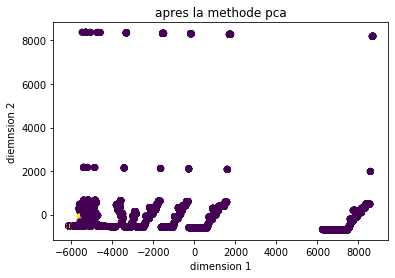

In [30]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

label = data['outcome']

pca = PCA(n_components=2)
x_p = pca.fit(data).transform(data)
print(x_p)
x = x_p[:,0]
y = x_p[:,1]

plt.figure()
plt.title('apres la methode pca')
plt.scatter(x, y,c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

<p style="color:green">Donc la couleur jaune représente les personnes mort </p>
<i style="color:blue">On peut aussi utiliser la méthode NMF</i>

[[64.54897217  0.        ]
 [64.5489722   0.        ]
 [64.54897224  0.        ]
 ...
 [65.91970054 11.86415499]
 [65.91970054 11.86496613]
 [65.91970054 11.86577727]]


Text(0, 0.5, 'diemnsion 2')

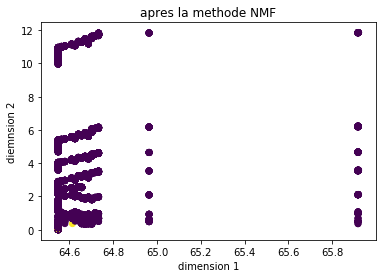

In [31]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
x_n = nmf.fit(data).transform(data)
print(x_n)
x = x_n[:,0]
y = x_n[:,1]

plt.figure()
plt.title('apres la methode NMF')
plt.scatter(x, y,c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

<h3 style="color:#8080C0">
Dans la suite, nous utilisons une méthode d'apprentissage automatique afin de prédire la classe : les patients sont soit «décédés» (‘died’) soit «sortis» (‘discharged’) de l'hôpital. Vous pouvez utiliser la classification par K-Nearest Neighbours (K-NN), l’arbre de decision ou le classificateur Bayes.</h3>

In [42]:
from sklearn.model_selection import train_test_split

X_train_outcome, X_test_outcome, y_train_outcome, y_test_outcome = train_test_split(PCA(n_components=2).fit(data.drop(['outcome'],axis=1)).transform(data.drop(['outcome'],axis=1)), data['outcome'], test_size=0.2, random_state=None)

In [43]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train_outcome,  y_train_outcome)
len(clf.predict(X_test_outcome))

2027

<h4>3. Les résultats obtenus doivent être validés en utilisant certains indices externes comme l’erreur de prédiction (matrice de confusion et précision) ou d'autres comme Rappel, F-Measure, ...</h4>

In [44]:
from sklearn.metrics import confusion_matrix
y_true = y_test_outcome
y_pred = clf.predict(X_test_outcome)
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat

array([[1959,   59],
       [   1,    8]])

In [46]:
#accuracy = (TP + TN) / (TP + FP + TN + FN)
accuracy = (conf_mat[0][0] + conf_mat[1][1]) / conf_mat.sum()
accuracy

0.970399605328071

<h4>4. Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la prédiction à l'aide de l'erreur MSE (Mean Squared Error).</h4>

In [47]:
correlation['age']

id                         0.001000
age                        1.000000
sex                        0.018261
city                       0.000521
latitude                   0.000578
longitude                  0.000578
date_onset_symptoms        0.082655
date_admission_hospital   -0.097302
date_confirmation          0.131672
symptoms                   0.290943
lives_in_wuhan             0.043413
additional_information    -0.260170
chronic_disease_binary     0.044631
chronic_disease           -0.085586
source                     0.029199
outcome                    0.469061
date_death_or_discharge    0.121319
admin3                     0.001558
admin2                     0.000580
admin_id                   0.000129
Name: age, dtype: float64

<p style="color:green">Voir les coefficients de la corrélation entre "age" et les autres variables. Selon le résultat, j'ai décidé de prendre les variables "outcome",'symptoms' et 'additional_information' pour faire la prédiction.</p>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data[['outcome','symptoms','additional_information']], data['age'], test_size=0.2, random_state=None)

In [51]:
from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()
lrModel.fit(X_train,y_train)

lrModel.predict(X_test)

array([57.0613103, 57.0613103, 57.0613103, ..., 57.0613103, 57.0613103,
       57.0613103])

In [52]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = lrModel.predict(X_test)
mean_squared_error(y_true, y_pred)

3.186625039396274

<h4>
5. Appliquer trois méthodes de clustering (K-means, NMF et CAH) sur l'ensemble de données pour segmenter les personnes en différents groupes. Utilisez l'index de Silhouette pour connaître le meilleur nombre de clusters.</h4>

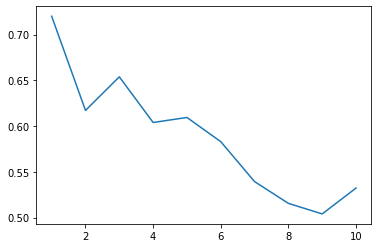

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_kmeans = np.zeros(10) 
for i in range(10):
    kmeans_model = KMeans(n_clusters=i+2).fit(x_p)
    silhouette_kmeans[i] = silhouette_score(x_p, kmeans_model.labels_)
plt.figure()
plt.plot(range(1,11),silhouette_kmeans)

In [129]:
# pas encore trouver la méthode pour calculer silhouette_score du NMF

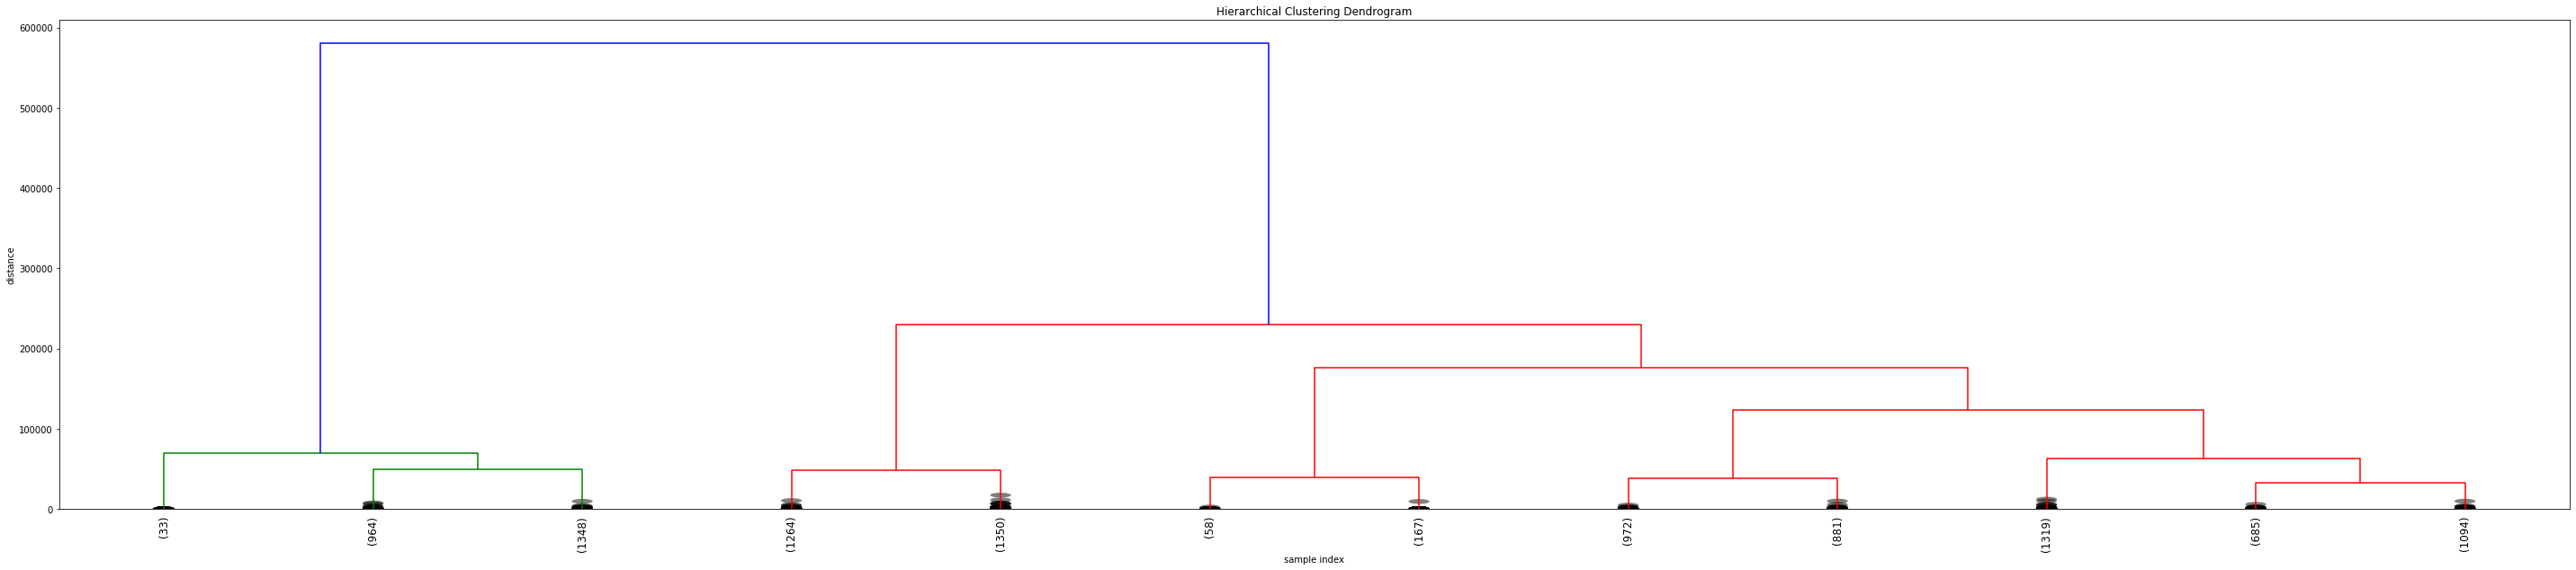

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(x_p, 'ward')
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

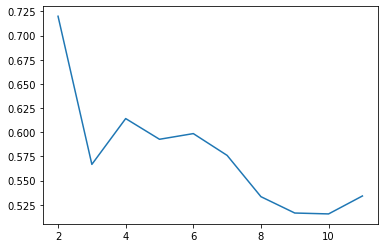

In [55]:
from scipy.cluster.hierarchy import fcluster

silhouette_cah = np.zeros(10) 
for i in range(10):
    Z = linkage(x_p, 'ward')
    silhouette_cah[i] = silhouette_score(x_p, fcluster(Z, i+2, criterion='maxclust'))
plt.figure()
plt.plot(range(2,12),silhouette_cah)

<h4>6. Visualisez les résultats à l'aide de scatter pour analyser visuellement la structure de clustering des trois méthodes.</h4>

Text(0, 0.5, 'diemnsion 2')

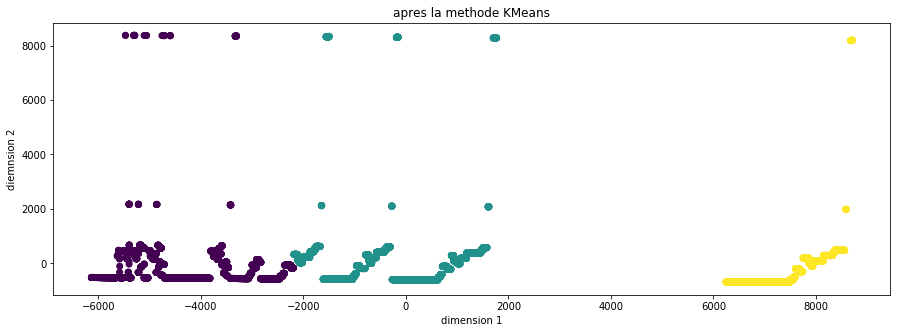

In [138]:
x = x_p[:,0]
y = x_p[:,1]

label = KMeans(n_clusters=3).fit(x_p).labels_

plt.figure(figsize=(15,5))
plt.title('apres la methode KMeans')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

Text(0, 0.5, 'diemnsion 2')

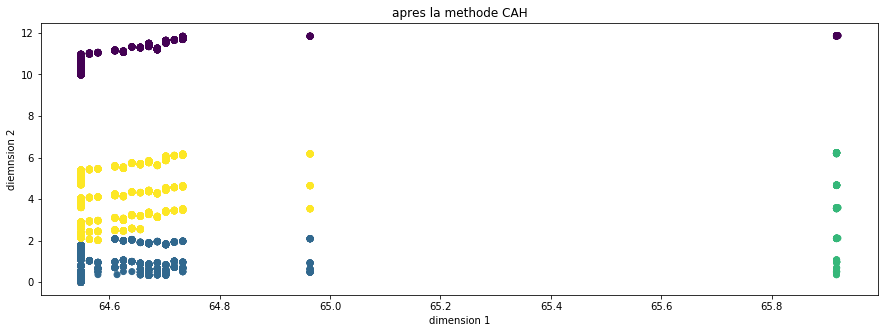

In [56]:
label = fcluster(Z, 4, criterion='maxclust')

plt.figure(figsize=(15,5))
plt.title('apres la methode CAH')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

<h4>7. Les données sont déséquilibrées. Vous pouvez les équilibrer en réduisant aléatoirement la classe majoritaire. Supposons que vous extrayez aléatoirement des échantillons équilibrés. Comment les résultats de la prédiction changeront-ils?</h4>

In [109]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[data['sex'] == 1], data[data['sex'] == 1]['outcome'], test_size=0.1, random_state=None)
x_train0, x_test0, y_train0, y_test0 = train_test_split(data[data['sex'] == 0], data[data['sex'] == 0]['outcome'], test_size=0.996, random_state=None)

In [110]:
len(x_train1)

35

In [111]:
len(x_train0)

40

In [113]:
x_train = pd.concat([x_train0,x_train1],axis = 0)
x_test = pd.concat([x_test0,x_test1],axis = 0)
y_train = pd.concat([y_train0,y_train1],axis = 0)
y_test = pd.concat([y_test0,y_test1],axis = 0)

clf = GaussianNB().fit(x_train,  y_train)
y_true = y_test
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat

array([[10031,     1],
       [    0,    28]])

In [115]:
#accuracy = (TP + TN) / (TP + FP + TN + FN)
accuracy = (conf_mat[0][0] + conf_mat[1][1]) / conf_mat.sum()
accuracy

0.9999005964214712

In [118]:
max(data['age'])

89.0

In [119]:
min(data['age'])

30.0

In [127]:
len(data[(data['age'] >= 30) & (data['age'] < 45)])

34

In [128]:
len(data[(data['age'] >= 45) & (data['age'] < 60)])

10031

In [129]:
len(data[(data['age'] >= 60) & (data['age'] < 75)])

39

In [130]:
len(data[(data['age'] >= 75) & (data['age'] < 90)])

31

In [131]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[(data['age'] >= 30) & (data['age'] < 45)], data[(data['age'] >= 30) & (data['age'] < 45)]['outcome'], test_size=0.1, random_state=None)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data[(data['age'] >= 45) & (data['age'] < 60)], data[(data['age'] >= 45) & (data['age'] < 60)]['outcome'], test_size=0.996, random_state=None)
x_train3, x_test3, y_train3, y_test3 = train_test_split(data[(data['age'] >= 60) & (data['age'] < 75)], data[(data['age'] >= 60) & (data['age'] < 75)]['outcome'], test_size=0.1, random_state=None)
x_train4, x_test4, y_train4, y_test4 = train_test_split(data[(data['age'] >= 75) & (data['age'] < 90)], data[(data['age'] >= 75) & (data['age'] < 90)]['outcome'], test_size=0.1, random_state=None)


In [132]:
len(x_train1)

30

In [133]:
len(x_train2)

40

In [134]:
len(x_train3)

35

In [135]:
len(x_train4)

27

In [136]:
x_train = pd.concat([x_train1,x_train2,x_train3,x_train4],axis = 0)
x_test = pd.concat([x_test1,x_test2,x_test3,x_test4],axis = 0)
y_train = pd.concat([y_train1,y_train2,y_train3,y_train4],axis = 0)
y_test = pd.concat([y_test1,y_test2,y_test3,y_test4],axis = 0)

clf = GaussianNB().fit(x_train,  y_train)
y_true = y_test
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_true, y_pred)
# TP FN
# FP TN
conf_mat

array([[9990,    1],
       [   0,   12]])

In [138]:
#accuracy = (TP + TN) / (TP + FP + TN + FN)
accuracy = (conf_mat[0][0] + conf_mat[1][1]) / conf_mat.sum()
accuracy

0.9999000299910027

Text(0, 0.5, 'diemnsion 2')

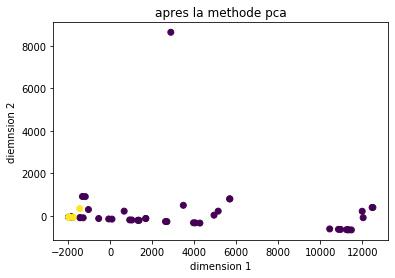

In [139]:
label = x_train['outcome']

pca = PCA(n_components=2)
x_p = pca.fit(x_train).transform(x_train)
x = x_p[:,0]
y = x_p[:,1]

plt.figure()
plt.title('apres la methode pca')
plt.scatter(x, y,c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

Text(0, 0.5, 'diemnsion 2')

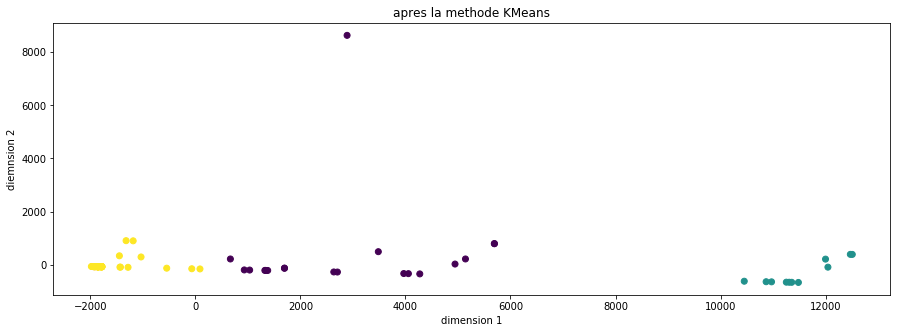

In [140]:
label = KMeans(n_clusters=3).fit(x_p).labels_

plt.figure(figsize=(15,5))
plt.title('apres la methode KMeans')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')

<p style="color:green">Selon les deux résultat obtenu, on a remarqué la qualité de la prédiction augmente </p>

<h4>8. Comment pouvez-vous mieux gérer ce déséquilibre entre les classes ?</h4>
<p style="color:green">On a remarqué qu'il y a pas mal des valeurs manquantes dans cette base de données, et on les remplacer par la moyenne ou par la mode, cela va amener des désquilibres entre les classes, et on essaie de trouver les variables qui ont forte lien avec la variable concerné pour la prédiction, en voyant le coefficient de la corrélation de chaque variable, et essaie de prendre le même nombre des valeurs aléatoirement de chaque type de valeur de la variable. Par exemple, Voir en dessous, on sais qu'il y a des déséquilibrement entre l'homme et femme dans la base de données d'entraînement, donc on essaie de prendre aléatoirement le nombre de valeurs quasiment le même entre l'homme et femme, ce qui aussi avoir des risque de d'autre part, et ne peut pas tout simplement dire que le modèle est le meuilleur, car on a finalement 75 données d'entraînement, pas 10135 de la base de données originale. D'ailleurs on peut aussi considérer la variable "age" qui ont aussi un très important lien avec le résultat. </p>

<h4>9. Pour trouver les meilleurs paramètres pour les modèles, l'algorithme Greedy Search peut être utilisé, disponible dans la bibliothèque scikit-learn. Expliquez l'algorithme et utilisez-le pour les modèles d'apprentissage choisis afin de trouver les meilleurs paramètres.</h4>

<h4>10. Présentez et expliquez le formalisme algorithmique et mathématique de la méthode qui donne les meilleurs résultats. Expliquez tous les paramètres de la méthode utilisée et leur impact sur les résultats.</h4>